In [1]:
from utils import *

### Baseline, end to end trained model

In [6]:
batch_size = 128
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = 'mps'
depth = 10
width = 50

fashion_dataset = FashionMNISTtrainer(batch_size)
params = dict(device=device,
                width=width, lr=0.01, num_train=5,
                sb=1, depth=depth, sw=1.5)

fashion_model = generate_fc_dnn(fashion_dataset.input_dim, fashion_dataset.output_dim,
                params).to(device)

pretrain_acc, pretrain_test_acc, pre_trained_model = compute_training_acc_epochs(fashion_model, fashion_dataset, params, debug=True)


yo
Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Tanh()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Tanh()
  (4): Linear(in_features=50, out_features=50, bias=True)
  (5): Tanh()
  (6): Linear(in_features=50, out_features=50, bias=True)
  (7): Tanh()
  (8): Linear(in_features=50, out_features=50, bias=True)
  (9): Tanh()
  (10): Linear(in_features=50, out_features=50, bias=True)
  (11): Tanh()
  (12): Linear(in_features=50, out_features=50, bias=True)
  (13): Tanh()
  (14): Linear(in_features=50, out_features=50, bias=True)
  (15): Tanh()
  (16): Linear(in_features=50, out_features=50, bias=True)
  (17): Tanh()
  (18): Linear(in_features=50, out_features=10, bias=True)
  (19): LogSoftmax(dim=1)
) SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Epoch: 0 	Training Accuracy: 68.17%
Validation Accuracy: 67.48%
E

### finetuned staring from regular mnist 

In [22]:
#luckily, the number of classes is the same, so we don't need to change the last layer.

number_dataset = MNISTtrainer(batch_size)

cut_models = []

params = dict(device=device,
                width=width, lr=0.01, num_train=2,
                sb=1, depth=depth, sw=1.5)

for cut in range(depth):
    temp = {}
    temp['cut_model'] = cut_model(fashion_model, sw = 1.5, sb = 1, cut_point = cut, freeze=False)
    finetuned_acc, finetuned_test_acc, finetuned_model = compute_training_acc_epochs(temp['cut_model'], number_dataset, params, debug=False)
    temp['finetuned_acc'] = finetuned_acc
    temp['finetuned_test_acc'] = finetuned_test_acc
    temp['finetuned_model'] = finetuned_model
    cut_models.append(temp)   

yo
yo
yo
yo
yo
yo
yo
yo
yo
yo


In [23]:
from pprint import pprint

for i, mod in enumerate(cut_models):
    print(f"Cut {i}:")
    pprint(mod['finetuned_acc'])

Cut 0:
0.7521481481481481
Cut 1:
0.7607407407407407
Cut 2:
0.7471296296296296
Cut 3:
0.79
Cut 4:
0.7794629629629629
Cut 5:
0.7832592592592592
Cut 6:
0.7901666666666667
Cut 7:
0.7797962962962963
Cut 8:
0.7991111111111111
Cut 9:
0.8135185185185185


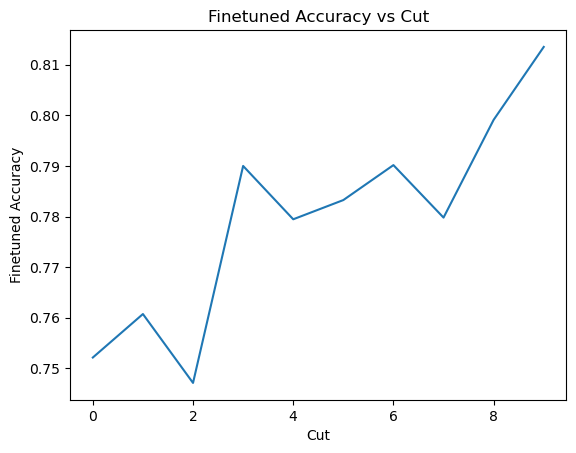

In [24]:
import matplotlib.pyplot as plt

finetuned_accs = [model['finetuned_acc'] for model in cut_models]
cuts = range(len(finetuned_accs))
plt.plot(cuts, finetuned_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Accuracy')
plt.title('Finetuned Accuracy vs Cut')
plt.show()

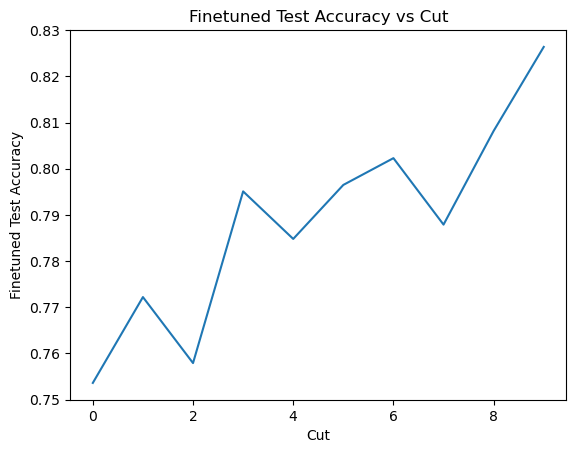

In [25]:
import matplotlib.pyplot as plt

finetuned_test_accs = [model['finetuned_test_acc'] for model in cut_models]
cuts = range(len(finetuned_test_accs))
plt.plot(cuts, finetuned_test_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Test Accuracy')
plt.title('Finetuned Test Accuracy vs Cut')
plt.show()

----